In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def file_open_by_numpy():
    
    np_arr = np.loadtxt('data/NFLX.CSV', delimiter=",", encoding='cp949', dtype=str )
    # data/NFLX.CSV 파일을 여는 과정
    return np_arr

In [3]:
arr = file_open_by_numpy()
print(arr)
# file_open_by_numpy 함수 실행

[['Date' 'Open' 'High' ... 'Close' 'Adj Close' 'Volume']
 ['2018-02-05' '262.000000' '267.899994' ... '254.259995' '254.259995'
  '11896100']
 ['2018-02-06' '247.699997' '266.700012' ... '265.720001' '265.720001'
  '12595800']
 ...
 ['2022-02-02' '448.250000' '451.980011' ... '429.480011' '429.480011'
  '14346000']
 ['2022-02-03' '421.440002' '429.260010' ... '405.600006' '405.600006'
  '9905200']
 ['2022-02-04' '407.309998' '412.769989' ... '410.170013' '410.170013'
  '7782400']]


In [4]:
import pandas as pd


df = pd.read_csv('data/NFLX.CSV')


df_result = df.drop(columns=['Volume', 'Adj Close'])
# Volume과 Adj Close 열을 삭제하고 출력

df_result

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


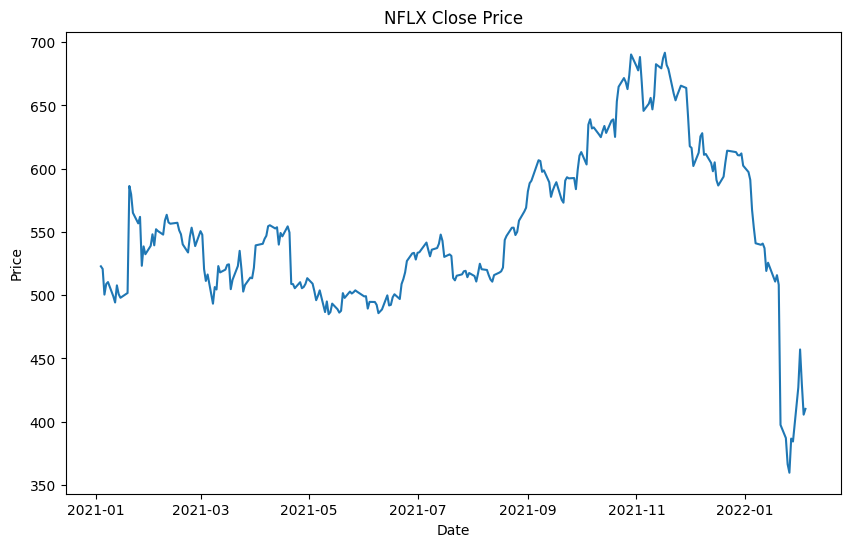

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/NFLX.CSV', parse_dates=['Date'])

df_filtered = df[df['Date'] >= '2021-01-01']
# 2021-01-01년 이후로 Date기록을 필터링

plt.figure(figsize=(10, 6)) 
plt.plot(df_filtered['Date'] , df_filtered['Close'], label='Close Price')
# X축에 Date, Y축에 Close를 나타냄


plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
# 제목은 NFLX Close Price, x축을 Date, y축을 Price로 정함.



plt.show()

In [6]:
df.loc[:, ['Close']]

max_Close = df_filtered['Close'].max()
min_Close = df_filtered['Close'].min()
# 2021년 1월 1일 이후로 필터링된 데이터에서 Close의 최댓값과 최솟값을 정의함.
print("최고 종가:", max_Close)
print("최저 종가:", min_Close)
# 이를 각각 출력

최고 종가: 691.690002
최저 종가: 359.700012


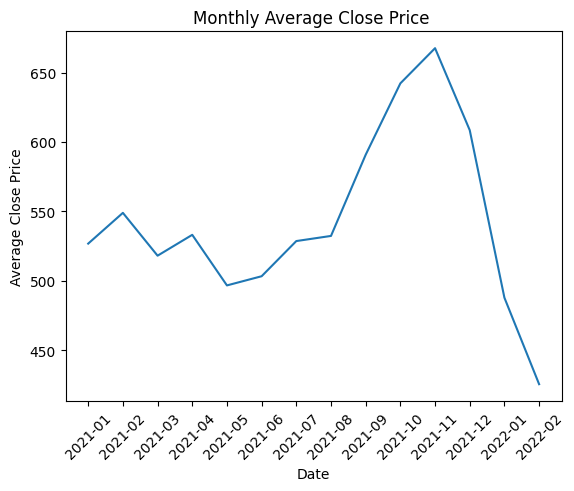

In [7]:


df['Date'] = pd.to_datetime(df['Date'])


df_filtered = df[df['Date'] >= '2021-01-01'].copy()
# 다시 필터링

monthly_avg = df_filtered.groupby(df_filtered['Date'].dt.to_period('M'))['Close'].mean().reset_index()
# groupby로 그룹화를 진행, Date를 Month에 따라서 분리함.
# mean으로 평균을 내고 reset_index() 인덱스를 다시 일반 컬림으로 빼냄.

monthly_avg['Date'] = monthly_avg['Date'].astype(str)



plt.plot(monthly_avg['Date'], monthly_avg['Close'], label='Average Close')
# 평균 낸 값을 x축에 입력, 그에 따른 종가를 입력
plt.title('Monthly Average Close Price ')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)



plt.show()

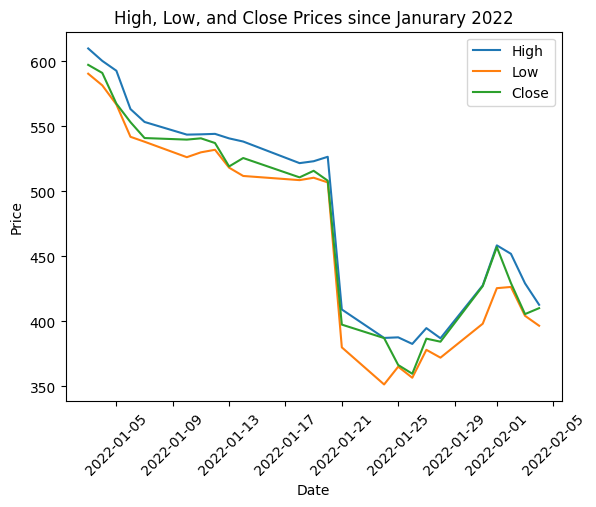

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df[df['Date'] >= '2022-01-01'].copy()

# 2022년 이후로 필터링 함.

plt.plot(df_filtered['Date'], df_filtered['High'], label = 'High')


plt.plot(df_filtered['Date'], df_filtered['Low'], label = 'Low')


plt.plot(df_filtered['Date'], df_filtered['Close'], label = 'Close')

# 최저, 최고, 종가를 각각 그래프에 나타냄.
plt.title('High, Low, and Close Prices since Janurary 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

연도별 변동폭 (2018-2021):
Year
2018    191.979995
2019    133.709991
2020    285.119995
2021    222.449981
dtype: float64


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15304\3427232367.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility_analysis = df[df['Year'].between(2018, 2021)].groupby('Year').apply(


<Axes: title={'center': 'Yearly Volatility (High-Low)'}, xlabel='Year'>

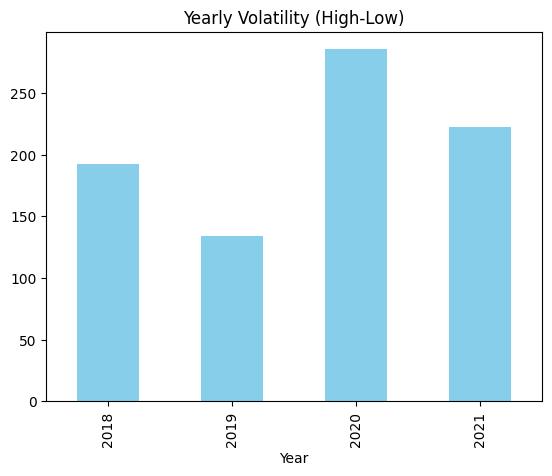

In [9]:
# 연도별로 최고가와 최저가의 차이(변동폭) 계산
df['Year'] = df['Date'].dt.year
volatility_analysis = df[df['Year'].between(2018, 2021)].groupby('Year').apply(
    lambda x: x['High'].max() - x['Low'].min()
)

print("연도별 변동폭 (2018-2021):")
print(volatility_analysis)

# 시각화
volatility_analysis.plot(kind='bar', color='skyblue', title='Yearly Volatility (High-Low)')


# 2018년부터 2021년까지(데이터 양이 적은 2022년은 제외) 가장 변동 폭이 넓은 년도에 대해서 설명을 부탁하는 프롬프트를 작성하였음.




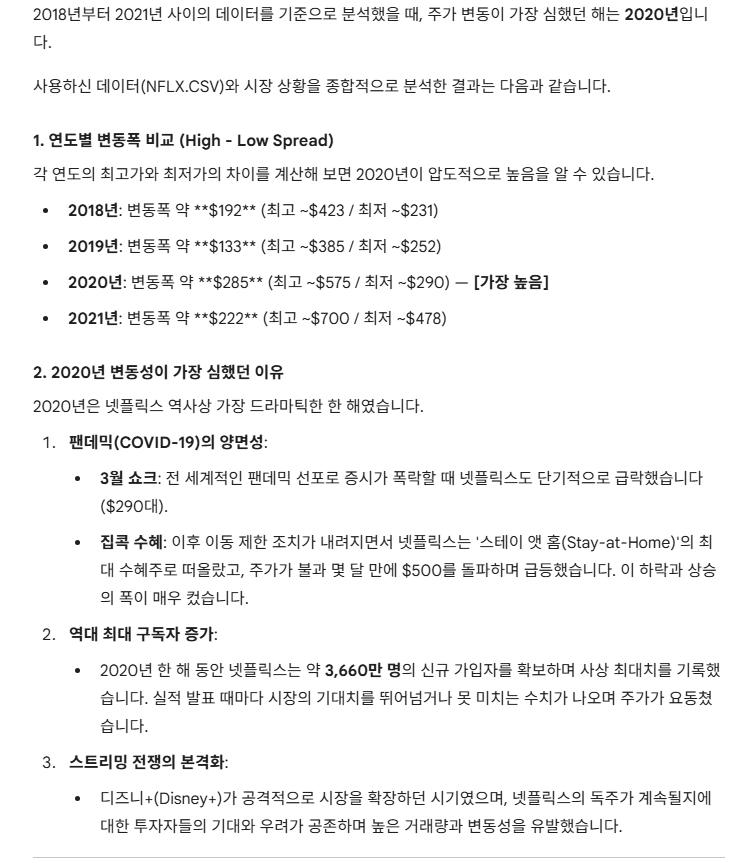

In [10]:

# 위의 사진은 생성형 AI가 NFLX.CSX를 통해 분석한 내용